In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _1), (x_test, _2) = fashion_mnist.load_data()
# _1 and _2 are labels but we are not using thme in AE

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
class Autoencoder(Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape

        self.encoder = tf.keras.Sequential([
          layers.Flatten(input_shape=(28,28)),
          layers.Dense(latent_dim, activation='relu'),
        ])

        self.decoder = tf.keras.Sequential([
          layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
          layers.Reshape(shape)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return decoded



In [5]:
shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)

In [6]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [26]:
history  = autoencoder.fit(x_train, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test, x_test))
#default batch size is 32 (32x1875)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0084 - val_loss: 0.0085
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0084 - val_loss: 0.0085
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0084 - val_loss: 0.0085
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

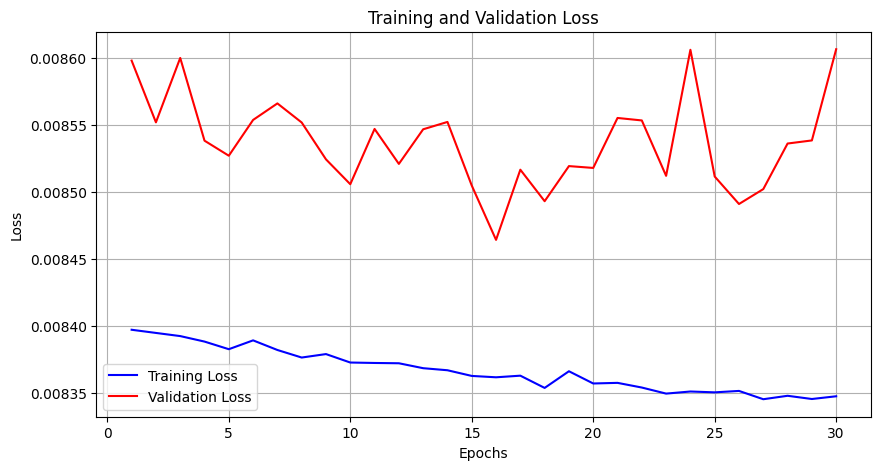

In [29]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a range of epoch numbers for the x-axis
epochs = range(1, 30 + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [30]:
print(autoencoder.encoder.summary())
print('\n\n')
print(autoencoder.decoder.summary())
print('\n\n')
print(autoencoder.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
Total params: 50240 (196.25 KB)
Trainable params: 50240 (196.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                      

In [9]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [10]:
decoded_imgs.shape

(10000, 28, 28)

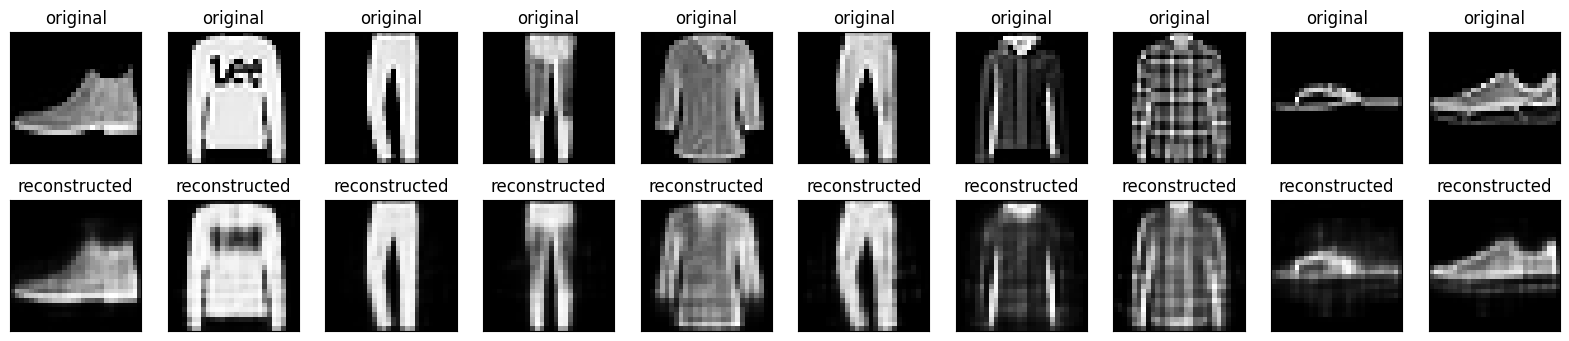

In [11]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:

import tensorflow as tf
x_test_reshaped = tf.reshape(x_test, (x_test.shape[0], 28, 28))
reconstructed_images = autoencoder(x_test_reshaped)
mse_loss = tf.keras.losses.MeanSquaredError()(x_test_reshaped, reconstructed_images)
average_mse_loss = tf.reduce_mean(mse_loss)
print("Average MSE Loss on Test Data:", average_mse_loss.numpy())


Average MSE Loss on Test Data: 0.008824072
